## Imports

In [1]:
!pip install geodatasets
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.4 MB/s eta 0:00:00


In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import pytz
import xml.etree.ElementTree as ET
import ast
import gdown

from sklearn.cluster import DBSCAN # or do we want to use kclusters?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import geopandas as gpd
import geodatasets
import contextily as cx

import requests

## Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/My Drive/Online_Behavior/project-2-locations/benny_Google_Maps_api_key.txt", "r") as f:
    api_key = f.read().strip()

In [3]:
file_id = "1hY7oBzcwP2VFMcJSg1Tcnfmxqo5_CsGu"
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id={file_id}" -O api_key.txt

with open("api_key.txt", "r") as f:
    api_key = f.read().strip()

--2025-04-01 19:10:20--  https://drive.google.com/uc?export=download&id=1hY7oBzcwP2VFMcJSg1Tcnfmxqo5_CsGu
Resolving drive.google.com (drive.google.com)... 74.125.69.101, 74.125.69.113, 74.125.69.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.69.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hY7oBzcwP2VFMcJSg1Tcnfmxqo5_CsGu&export=download [following]
--2025-04-01 19:10:20--  https://drive.usercontent.google.com/download?id=1hY7oBzcwP2VFMcJSg1Tcnfmxqo5_CsGu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39 [application/octet-stream]
Saving to: ‘api_key.txt’

api_key.txt         100%[===================>]      39  --.-KB/s    in 0s      

20

In [4]:
file_id = "1xAdABFNnm5QMbJqADe6PYUrG3ZZ_biIk" # Alip's data
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id={file_id}" -O location.json

with open("location.json", "r") as f:
  data = json.load(f)

print(data)

--2025-04-01 19:10:22--  https://drive.google.com/uc?export=download&id=1xAdABFNnm5QMbJqADe6PYUrG3ZZ_biIk
Resolving drive.google.com (drive.google.com)... 74.125.69.101, 74.125.69.113, 74.125.69.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.69.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xAdABFNnm5QMbJqADe6PYUrG3ZZ_biIk&export=download [following]
--2025-04-01 19:10:22--  https://drive.usercontent.google.com/download?id=1xAdABFNnm5QMbJqADe6PYUrG3ZZ_biIk&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309653 (302K) [application/octet-stream]
Saving to: ‘location.json’

location.json       100%[===================>] 302.40K  --.-KB/s    in

In [5]:
df = pd.DataFrame(data)
df

,endTime,startTime,visit,activity,timelinePath
0,2025-02-21T18:17:33.771-05:00,2025-02-21T15:13:00.690-05:00,"{'hierarchyLevel': '0', 'topCandidate': {'prob...",NaN,NaN
1,2025-02-21T20:36:45.999-05:00,2025-02-21T18:17:33.771-05:00,NaN,"{'probability': '0.631680', 'end': 'geo:38.032...",NaN
2,2025-02-21T20:46:38.999-05:00,2025-02-21T20:36:45.999-05:00,NaN,"{'probability': '0.990550', 'end': 'geo:38.033...",NaN
3,2025-02-21T20:53:07.000-05:00,2025-02-21T20:46:38.999-05:00,"{'hierarchyLevel': '0', 'topCandidate': {'prob...",NaN,NaN
4,2025-02-21T21:03:24.999-05:00,2025-02-21T20:53:07.000-05:00,NaN,"{'probability': '0.986313', 'end': 'geo:38.029...",NaN
...,...,...,...,...,...
396,2025-03-25T00:00:00.000Z,2025-03-24T22:00:00.000Z,NaN,NaN,"[{'point': 'geo:38.031041,-78.508289', 'durati..."
397,2025-03-25T02:00:00.000Z,2025-03-25T00:00:00.000Z,NaN,NaN,"[{'point': 'geo:38.029710,-78.510436', 'durati..."
398,2025-03-25T04:00:00.000Z,2025-03-25T02:00:00.000Z,NaN,NaN,"[{'point': 'geo:38.029489,-78.510326', 'durati..."
399,2025-03-25T16:00:00.000Z,2025-03-25T14:00:00.000Z,NaN,NaN,"[{'point': 'geo:38.030660,-78.511282', 'durati..."


In [ ]:
# Gonna assume visits are when you are staying in one place? (activity is walking, dirving etc) Also need to filter out timeline paths, coordinates where you stay for longer than a certain amoutn of time

In [6]:
records = []
for entry in data:
  if 'visit' in entry and 'topCandidate' in entry['visit']:
    start_time = entry['startTime']
    end_time = entry['endTime']
    location_str = entry['visit']['topCandidate']['placeLocation']
    if location_str.startswith("geo:"):
      lat, lon = map(float, location_str[4:].split(","))
      records.append({
        'start_time': pd.to_datetime(start_time),
        'end_time': pd.to_datetime(end_time),
        'latitude': lat,
        'longitude': lon
      })
  if 'timelinePath' in entry:
    base_time = pd.to_datetime(entry['startTime'], errors='coerce') # for the first point
    for i in range(1, len(entry['timelinePath'])):

      prev_point = entry['timelinePath'][i - 1]
      curr_point = entry['timelinePath'][i]

      prev_offset = int(prev_point['durationMinutesOffsetFromStartTime'])
      curr_offset = int(curr_point['durationMinutesOffsetFromStartTime'])

      prev_time = base_time + pd.to_timedelta(prev_offset, unit='m')
      curr_time = base_time + pd.to_timedelta(curr_offset, unit='m')

      duration = (curr_time - prev_time).total_seconds()

      if duration > 600: # places stayed at for longer than 10 mins?
        location_str = curr_point['point']
        if location_str.startswith("geo:"):
          lat, lon = map(float, location_str[4:].split(","))
          records.append({
            'start_time': prev_time,
            'end_time': curr_time,
            'latitude': lat,
            'longitude': lon
          })
locations = pd.DataFrame(records)

locations['start_time'] = pd.to_datetime(locations['start_time'], utc=True)
locations['end_time'] = pd.to_datetime(locations['end_time'], utc=True)
locations['start_time'] = locations['start_time'].dt.tz_convert('US/Eastern')
locations['end_time'] = locations['end_time'].dt.tz_convert('US/Eastern')
# the above fixed an issue where the times would not convert and turn into NaT

locations['duration'] = (locations['end_time'] - locations['start_time']).dt.total_seconds()
locations

filtered_locations = locations[locations['duration'] > 600] # places stayed at for longer than 10 mins?
filtered_locations

,start_time,end_time,latitude,longitude,duration
0,2025-02-21 15:13:00.690000-05:00,2025-02-21 18:17:33.771000-05:00,38.033553,-78.507977,11073.081
2,2025-02-21 21:03:24.999000-05:00,2025-02-22 11:54:17.958000-05:00,38.033553,-78.507977,53452.959
3,2025-02-22 12:10:13-05:00,2025-02-22 13:21:30.816000-05:00,38.070488,-78.485616,4277.816
4,2025-02-22 20:26:09.858000-05:00,2025-02-22 22:43:08.655000-05:00,38.031532,-78.489262,8218.797
5,2025-02-22 22:53:42.966000-05:00,2025-02-23 13:35:38.967000-05:00,38.033553,-78.507977,52916.001
...,...,...,...,...,...
185,2025-03-22 22:09:00-04:00,2025-03-22 23:01:00-04:00,38.029614,-78.510182,3120.000
186,2025-03-23 14:21:00-04:00,2025-03-23 15:58:00-04:00,38.002061,-78.499011,5820.000
187,2025-03-23 16:09:00-04:00,2025-03-23 17:04:00-04:00,38.031573,-78.510284,3300.000
188,2025-03-23 17:28:00-04:00,2025-03-23 17:47:00-04:00,38.068632,-78.490717,1140.000


In [7]:
locations['start_time'] = pd.to_datetime(locations['start_time'], utc=True)
locations['end_time'] = pd.to_datetime(locations['end_time'], utc=True)
locations['start_time'] = locations['start_time'].dt.tz_convert('US/Eastern')
locations['end_time'] = locations['end_time'].dt.tz_convert('US/Eastern')
# the above fixed an issue where the times would not convert and turn into NaT

locations['duration'] = (locations['end_time'] - locations['start_time']).dt.total_seconds()
locations

,start_time,end_time,latitude,longitude,duration
0,2025-02-21 15:13:00.690000-05:00,2025-02-21 18:17:33.771000-05:00,38.033553,-78.507977,11073.081
1,2025-02-21 20:46:38.999000-05:00,2025-02-21 20:53:07-05:00,38.031925,-78.481675,388.001
2,2025-02-21 21:03:24.999000-05:00,2025-02-22 11:54:17.958000-05:00,38.033553,-78.507977,53452.959
3,2025-02-22 12:10:13-05:00,2025-02-22 13:21:30.816000-05:00,38.070488,-78.485616,4277.816
4,2025-02-22 20:26:09.858000-05:00,2025-02-22 22:43:08.655000-05:00,38.031532,-78.489262,8218.797
...,...,...,...,...,...
185,2025-03-22 22:09:00-04:00,2025-03-22 23:01:00-04:00,38.029614,-78.510182,3120.000
186,2025-03-23 14:21:00-04:00,2025-03-23 15:58:00-04:00,38.002061,-78.499011,5820.000
187,2025-03-23 16:09:00-04:00,2025-03-23 17:04:00-04:00,38.031573,-78.510284,3300.000
188,2025-03-23 17:28:00-04:00,2025-03-23 17:47:00-04:00,38.068632,-78.490717,1140.000


In [8]:
filtered_locations = locations[locations['duration'] > 600] # places stayed at for longer than 10 mins?
filtered_locations

,start_time,end_time,latitude,longitude,duration
0,2025-02-21 15:13:00.690000-05:00,2025-02-21 18:17:33.771000-05:00,38.033553,-78.507977,11073.081
2,2025-02-21 21:03:24.999000-05:00,2025-02-22 11:54:17.958000-05:00,38.033553,-78.507977,53452.959
3,2025-02-22 12:10:13-05:00,2025-02-22 13:21:30.816000-05:00,38.070488,-78.485616,4277.816
4,2025-02-22 20:26:09.858000-05:00,2025-02-22 22:43:08.655000-05:00,38.031532,-78.489262,8218.797
5,2025-02-22 22:53:42.966000-05:00,2025-02-23 13:35:38.967000-05:00,38.033553,-78.507977,52916.001
...,...,...,...,...,...
185,2025-03-22 22:09:00-04:00,2025-03-22 23:01:00-04:00,38.029614,-78.510182,3120.000
186,2025-03-23 14:21:00-04:00,2025-03-23 15:58:00-04:00,38.002061,-78.499011,5820.000
187,2025-03-23 16:09:00-04:00,2025-03-23 17:04:00-04:00,38.031573,-78.510284,3300.000
188,2025-03-23 17:28:00-04:00,2025-03-23 17:47:00-04:00,38.068632,-78.490717,1140.000


In [9]:
# Clustering using DBSCAN
epsilon = 0.001
min_samples = 5
coords = filtered_locations[['latitude', 'longitude']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)
db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean').fit(coords_scaled)
filtered_locations['cluster'] = db.labels_

<ipython-input-9-43e5983081f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations['cluster'] = db.labels_


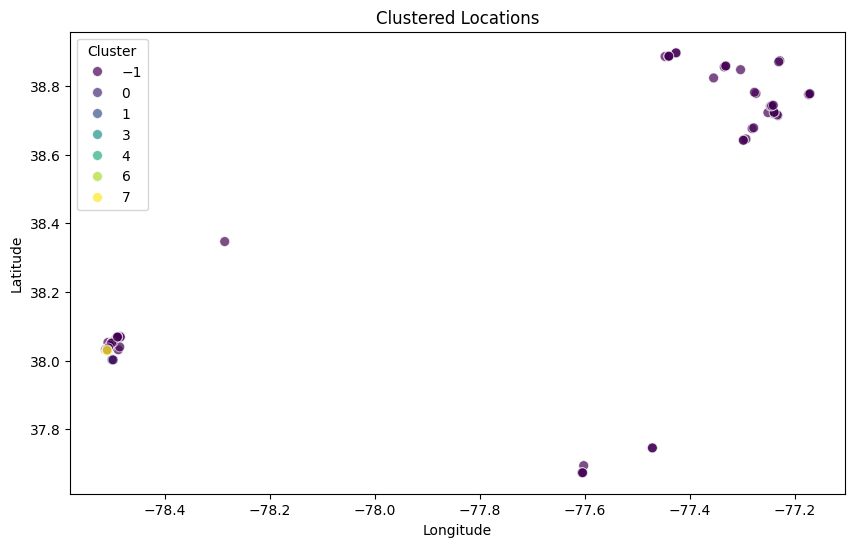

In [10]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_locations, x='longitude', y='latitude', hue='cluster', palette='viridis', s=50, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Locations')
plt.legend(title='Cluster')
plt.show()

<ipython-input-11-1aeb5e3d5030>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


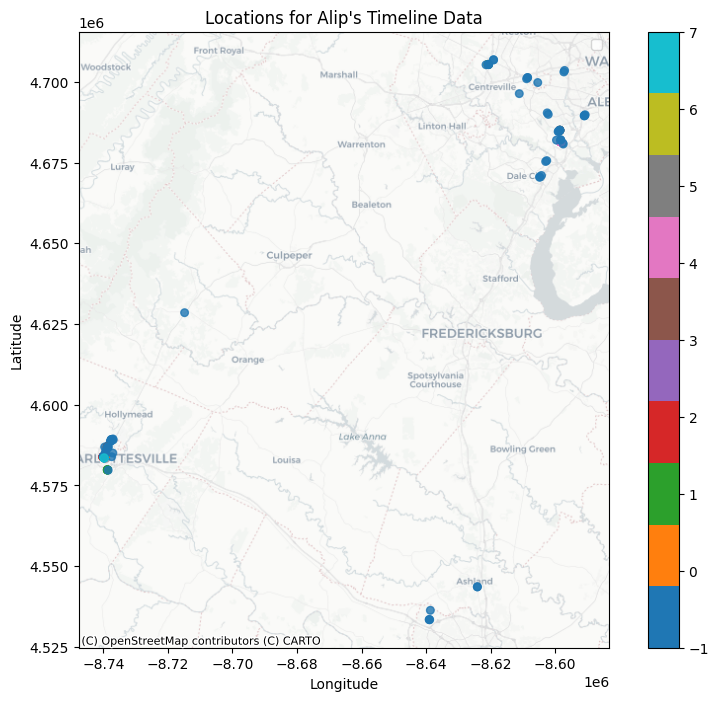

In [11]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_locations, geometry=gpd.points_from_xy(filtered_locations.longitude, filtered_locations.latitude))

# Set coordinate system to WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to web Mercator projection for plotting with contextily
gdf = gdf.to_crs(epsg=3857)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, column="cluster", cmap="tab10", legend=True, markersize=30, alpha=0.8) #plot by cluster

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Labels
ax.set_title("Locations for Alip's Timeline Data")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()

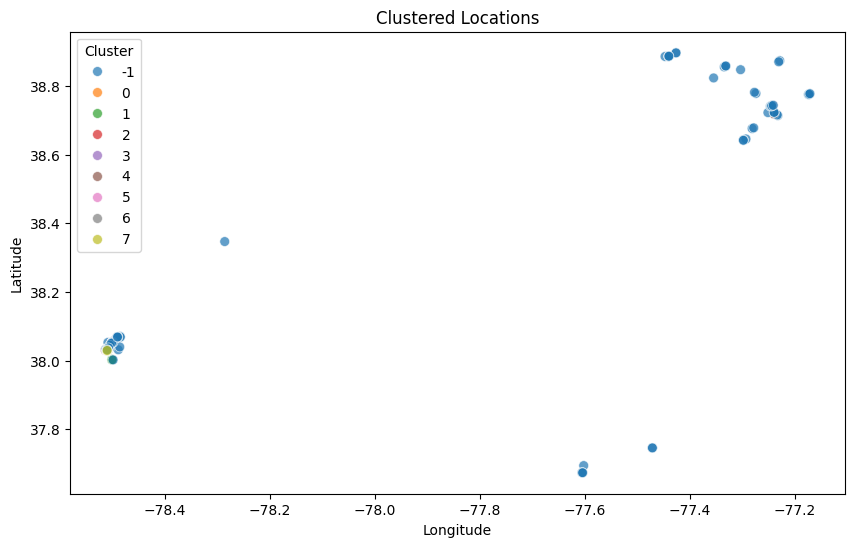

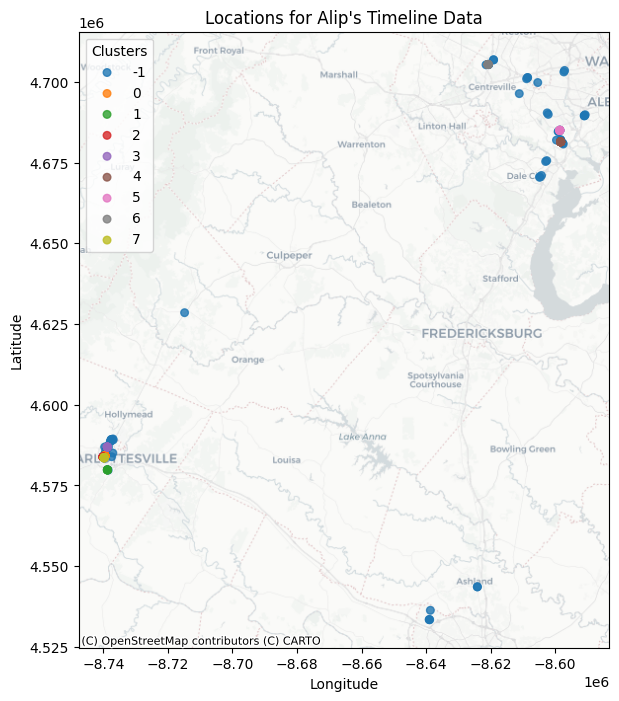

In [13]:
# THIS CODE IS TO MAKE THE CLUSTER COLORS MATCH AND FIX THE WEIRD LEGEND ON THE MAP VERSION

# Define a consistent color mapping based on Seaborn's tab10 palette
unique_clusters = sorted(filtered_locations['cluster'].unique())
palette = sns.color_palette("tab10", len(unique_clusters))
color_mapping = {cluster: palette[i] for i, cluster in enumerate(unique_clusters)}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_locations,
    x='longitude',
    y='latitude',
    hue='cluster',
    palette=color_mapping,
    s=50, alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Locations')
plt.legend(title='Cluster')
plt.show()

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_locations, geometry=gpd.points_from_xy(filtered_locations.longitude, filtered_locations.latitude)
)

# Set coordinate system to WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to web Mercator projection for contextily plotting
gdf = gdf.to_crs(epsg=3857)

# Plot with consistent colors !!!
fig, ax = plt.subplots(figsize=(10, 8))
for cluster, color in color_mapping.items():
    cluster_data = gdf[gdf["cluster"] == cluster]
    cluster_data.plot(ax=ax, color=[color] * len(cluster_data), markersize=30, alpha=0.8, label=f"{cluster}")

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Labels and legend
ax.set_title("Locations for Alip's Timeline Data")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Clusters")

plt.show()

In [ ]:
# need an api key to get google maps background
# WHY is it skipping clusters? Does not plot c

# Apparently 38.033553, -78.507977 is Clark Hall
# ... this shows you've been skipping class because there are no points by mechnical engineering building
# or is it an error? Do you never go to Rice?

#LMAOOOOOO

In [14]:
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    'location': '37.875700,-79.309532',
    'radius': 50,  # Search within 50 meters
    'key': api_key
}

response = requests.get(url, params=params)
data = response.json()
#print(data)

if 'results' in data and len(data['results']) > 0:
  place = data['results'][0]  # Get the top result
  print(place)

{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 37.8757003, 'lng': -79.3095316}, 'viewport': {'northeast': {'lat': 37.8769539802915, 'lng': -79.30809766970849}, 'southwest': {'lat': 37.8742560197085, 'lng': -79.31079563029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'icon_background_color': '#7B9EB0', 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet', 'name': 'Fairfield Safety Rest Area', 'opening_hours': {'open_now': True}, 'photos': [{'height': 3060, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/104158207645061052975">John Seckar</a>'], 'photo_reference': 'AUy1YQ2FNdhfYfR30PLZg7msptEzz9NTs6bzyR33kcQyH69QuMr5O7WEkdd2XQ4YZB5cEamyMk5XnaoAXNvVD_eJJS-4ksNF0gv58eOPJ9ItdC-tjh9eypZ1zdFNTHB2qOUm3PMO5_NUcwYCDaLKRuA3AY28SKsga0s_gSI2SHxitrtruX9I_AFGGPHQSqwxmYJoHdPiZvDXhbKVhk73Ib6-9XCAeupgfuuIQj3iiR0u6Jn1Sg4UEOGnV3KXlfTipGK4xogBzzCydvkFT4BxkCwIijnofNnqeRd7

In [15]:
def get_place_details(latitude, longitude, api_key):
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    params = {
        'location': f"{latitude},{longitude}",
        'radius': 50,  # Search radius in meters
        'key': api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if 'results' in data and len(data['results']) > 0:
        place = data['results'][0]  # Get the top result
        return {
            "name": place.get("name"),
            "types": place.get("types"),
            "vicinity": place.get("vicinity")
        }
    else:
        return None

In [16]:
# Dictionary to cache results and avoid duplicate API calls
location_cache = {}

# Apply function to each row
def enrich_with_place_info(row):
    lat, lon = row["latitude"], row["longitude"]
    location_key = (lat, lon)

    if location_key not in location_cache:
        #time.sleep(0.5)  # Prevent hitting API limits
        location_cache[location_key] = get_place_details(lat, lon, api_key)

    return pd.Series(location_cache[location_key])

# Apply function to add new columns
filtered_locations[["place_name", "place_types", "place_vicinity"]] = filtered_locations.apply(enrich_with_place_info, axis=1)

filtered_locations["place_types"] = filtered_locations["place_types"].astype(str)

# Display enriched DataFrame
print(filtered_locations)

print(filtered_locations["place_types"].unique())
print(filtered_locations["place_name"].unique())

                          start_time                         end_time  \
0   2025-02-21 15:13:00.690000-05:00 2025-02-21 18:17:33.771000-05:00   
2   2025-02-21 21:03:24.999000-05:00 2025-02-22 11:54:17.958000-05:00   
3          2025-02-22 12:10:13-05:00 2025-02-22 13:21:30.816000-05:00   
4   2025-02-22 20:26:09.858000-05:00 2025-02-22 22:43:08.655000-05:00   
5   2025-02-22 22:53:42.966000-05:00 2025-02-23 13:35:38.967000-05:00   
..                               ...                              ...   
185        2025-03-22 22:09:00-04:00        2025-03-22 23:01:00-04:00   
186        2025-03-23 14:21:00-04:00        2025-03-23 15:58:00-04:00   
187        2025-03-23 16:09:00-04:00        2025-03-23 17:04:00-04:00   
188        2025-03-23 17:28:00-04:00        2025-03-23 17:47:00-04:00   
189        2025-03-24 00:00:00-04:00        2025-03-24 01:40:00-04:00   

      latitude  longitude   duration  cluster              place_name  \
0    38.033553 -78.507977  11073.081        0    2

<ipython-input-16-333717b7547b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations[["place_name", "place_types", "place_vicinity"]] = filtered_locations.apply(enrich_with_place_info, axis=1)
<ipython-input-16-333717b7547b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations[["place_name", "place_types", "place_vicinity"]] = filtered_locations.apply(enrich_with_place_info, axis=1)
<ipython-input-16-333717b7547b>:16: SettingWithCopyWarning: 
A value is trying to be set on a 

In [17]:
# types of places:  ['route' 'locality' 'political' 'pharmacy' 'point_of_interest' 'store' 'health' 'establishment' 'neighborhood']

# Filter out rows where place_types is exactly "route"
filtered_locations = filtered_locations[filtered_locations["place_types"] != "['route']"]
# Reset index after filtering
filtered_locations.reset_index(drop=True, inplace=True)

print(filtered_locations["place_name"].unique())
print(filtered_locations)

['Mill Creek' 'University of Virginia' 'Charlottesville'
 'Regal Stonefield' 'Laurel Hill' 'Newington Forest' 'Potomac Mills'
 'Burke' 'Sheetz' 'Springfield' 'Fairfax' 'Merrifield'
 'Costco Vision Center']
                         start_time                         end_time  \
0         2025-02-23 13:57:09-05:00 2025-02-23 17:29:08.999000-05:00   
1  2025-02-23 18:46:22.730000-05:00 2025-02-23 19:33:42.794000-05:00   
2  2025-02-23 21:39:50.849000-05:00 2025-02-23 22:04:33.217000-05:00   
3  2025-02-24 20:27:07.073000-05:00 2025-02-24 22:46:48.882000-05:00   
4  2025-02-26 14:08:23.692000-05:00 2025-02-26 15:55:46.842000-05:00   
..                              ...                              ...   
61        2025-03-01 15:12:00-05:00        2025-03-01 16:37:00-05:00   
62        2025-03-02 17:12:00-05:00        2025-03-02 18:04:00-05:00   
63        2025-03-08 15:24:00-05:00        2025-03-08 15:45:00-05:00   
64        2025-03-10 06:29:00-04:00        2025-03-10 06:40:00-04:00   
65

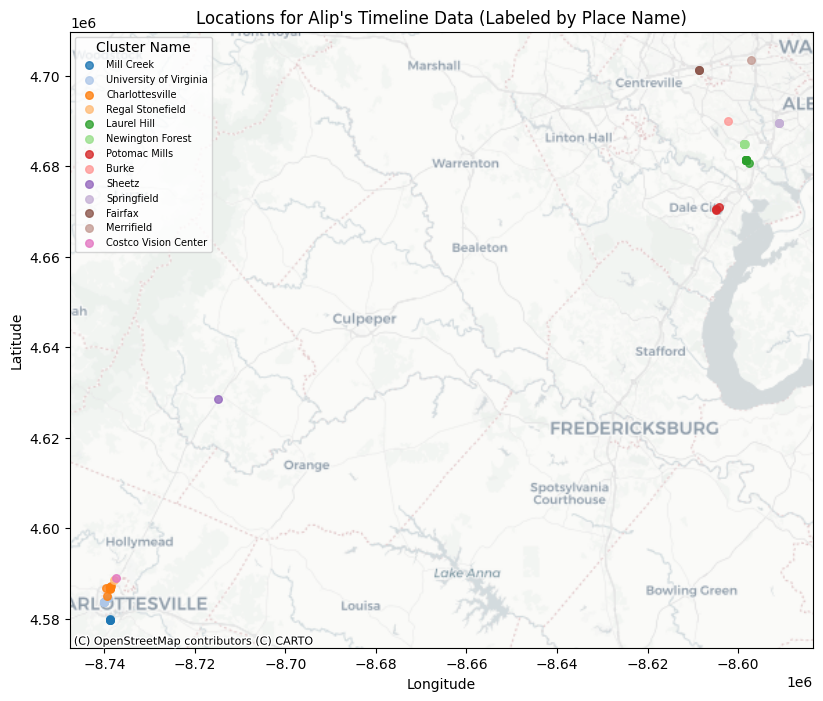

In [18]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_locations,
    geometry=gpd.points_from_xy(filtered_locations.longitude, filtered_locations.latitude)
)

# Set coordinate system to WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to Web Mercator projection for better plotting
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8))

# Create a color map for unique place names
unique_places = gdf["place_name"].unique()
colors = plt.cm.tab20(range(len(unique_places)))  # Generate unique colors

# Plot each place separately
for place, color in zip(unique_places, colors):
    subset = gdf[gdf["place_name"] == place]
    subset.plot(ax=ax, color=color, markersize=30, label=place, alpha=0.8)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Labels and title
ax.set_title("Locations for Alip's Timeline Data (Labeled by Place Name)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Add legend
ax.legend(
    title="Cluster Name",
    loc="upper left",
    # bbox_to_anchor=(1.05, 1),  # Moves the legend outside the plot
    fontsize=7
)

# Show the plot
plt.show()

In [19]:
specific_type_df = filtered_locations[filtered_locations["place_types"] == "['locality', 'political']"]
print(specific_type_df)

specific_place_df = filtered_locations[filtered_locations["place_name"] == 'University of Virginia']
print(specific_place_df)

                         start_time                         end_time  \
1  2025-02-23 18:46:22.730000-05:00 2025-02-23 19:33:42.794000-05:00   
2  2025-02-23 21:39:50.849000-05:00 2025-02-23 22:04:33.217000-05:00   
3  2025-02-24 20:27:07.073000-05:00 2025-02-24 22:46:48.882000-05:00   
4  2025-02-26 14:08:23.692000-05:00 2025-02-26 15:55:46.842000-05:00   
6  2025-02-27 19:22:19.984000-05:00 2025-02-27 20:26:34.403000-05:00   
7  2025-02-27 19:22:19.984000-05:00 2025-02-27 19:32:55.646000-05:00   
8  2025-02-27 22:17:15.020000-05:00 2025-02-28 00:08:09.031000-05:00   
9  2025-02-28 12:14:32.287000-05:00 2025-02-28 13:42:07.491000-05:00   
10 2025-02-28 23:15:34.999000-05:00 2025-03-01 05:44:05.468000-05:00   
11 2025-03-01 05:45:52.483000-05:00 2025-03-01 06:02:12.267000-05:00   
12 2025-03-01 06:09:48.418000-05:00 2025-03-01 12:56:56.001000-05:00   
13 2025-03-01 14:20:06.999000-05:00 2025-03-01 14:50:08.405000-05:00   
14 2025-03-01 15:09:40.744000-05:00 2025-03-01 16:37:04.685000-0

In [20]:
def infer_location_type(row):
    place_types = row["place_types"]  # This is a list
    place_name = row["place_name"] if row["place_name"] else ""

    # Heuristic rules based on place types and name
    # Rule 1: If the location has a type indicating residence or is frequently visited at night.
    if "neighborhood" in place_types:
        return "Sleeping Place"

    # Rule 2: Store or establishment.
    elif "store" in place_types:
        return "Store/Restaurant"

    # Rule 3: Maybe point_of_interest --> tourist destination .
    elif "point_of_interest" in place_types:
        return "Vacation"


    # Rule 4: UVA filter
    if "University of Virginia" == place_name:
        return "School"

    # If none of the above rules match, return "Other"
    return "Other"

In [21]:
# Assuming filtered_locations is your DataFrame enriched with API data
filtered_locations["location_label"] = filtered_locations.apply(infer_location_type, axis=1)

# Display the updated DataFrame with the new label column
print(filtered_locations[["place_name", "place_types", "location_label"]])

                place_name                                        place_types  \
0               Mill Creek                      ['neighborhood', 'political']   
1   University of Virginia                          ['locality', 'political']   
2          Charlottesville                          ['locality', 'political']   
3          Charlottesville                          ['locality', 'political']   
4   University of Virginia                          ['locality', 'political']   
..                     ...                                                ...   
61           Potomac Mills                          ['locality', 'political']   
62    Costco Vision Center  ['health', 'store', 'point_of_interest', 'esta...   
63             Springfield                          ['locality', 'political']   
64        Newington Forest                          ['locality', 'political']   
65         Charlottesville                          ['locality', 'political']   

      location_label  
0   

<ipython-input-21-3fb2b02c58d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations["location_label"] = filtered_locations.apply(infer_location_type, axis=1)


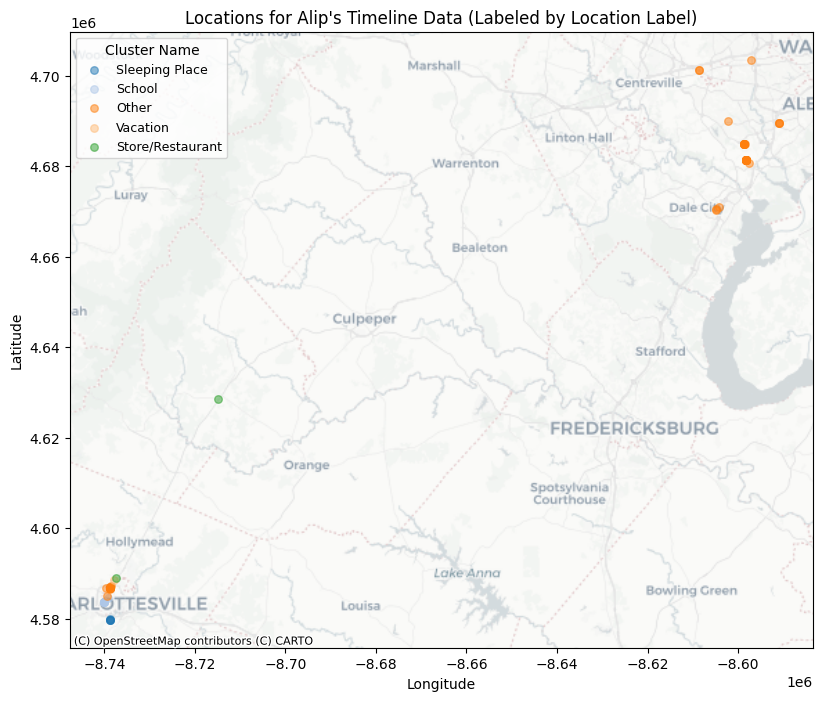

In [22]:
gdf = gpd.GeoDataFrame(
    filtered_locations,
    geometry=gpd.points_from_xy(filtered_locations.longitude, filtered_locations.latitude)
)

# Set coordinate system to WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to Web Mercator projection for better plotting
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8))

# Create a color map for unique place names
unique_places = gdf["location_label"].unique()
colors = plt.cm.tab20(range(len(unique_places)))  # Generate unique colors

# Plot each place separately
for place, color in zip(unique_places, colors):
    subset = gdf[gdf["location_label"] == place]
    subset.plot(ax=ax, color=color, markersize=30, label=place, alpha=0.5)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Labels and title
ax.set_title("Locations for Alip's Timeline Data (Labeled by Location Label)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Add legend inside the plot at the top left
ax.legend(
    title="Cluster Name",
    loc="upper left",
    fontsize=9
)

# Show the plot
plt.show()

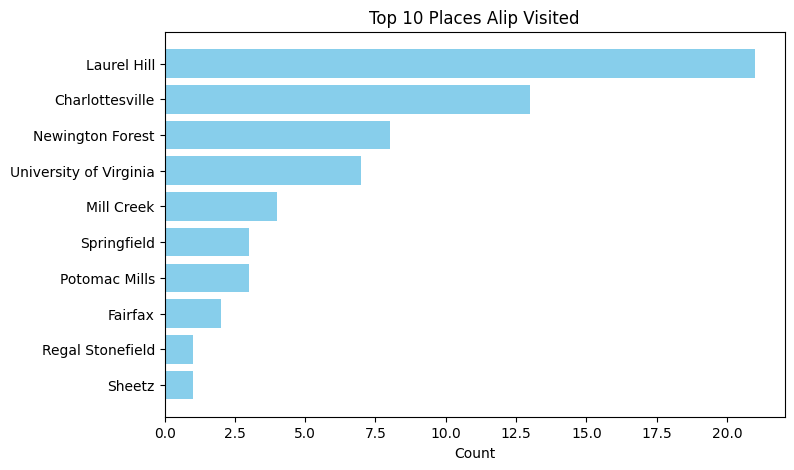

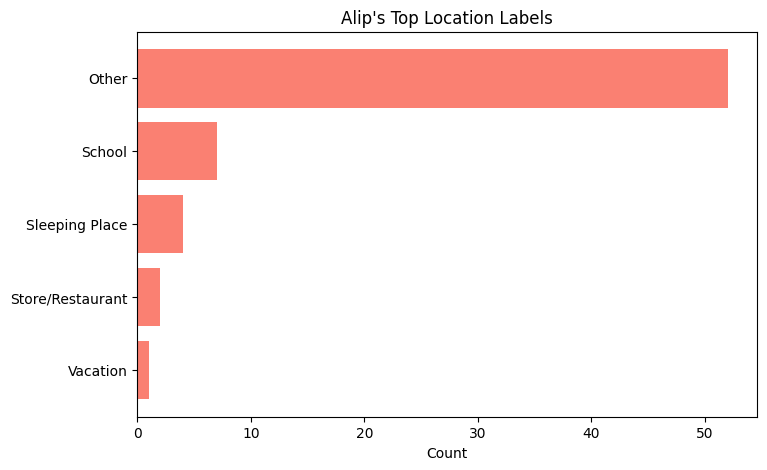

In [25]:
place_counts = filtered_locations['place_name'].value_counts().nlargest(10)
location_counts = filtered_locations['location_label'].value_counts()

# Plot Top 10 Places Visited
plt.figure(figsize=(8, 5))
plt.barh(place_counts.index, place_counts.values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Places Alip Visited')
plt.xlabel('Count')
plt.show()

# Plot Top Location Labels
plt.figure(figsize=(8, 5))
plt.barh(location_counts.index, location_counts.values, color='salmon')
plt.gca().invert_yaxis()
plt.title("Alip's Top Location Labels")
plt.xlabel('Count')
plt.show()

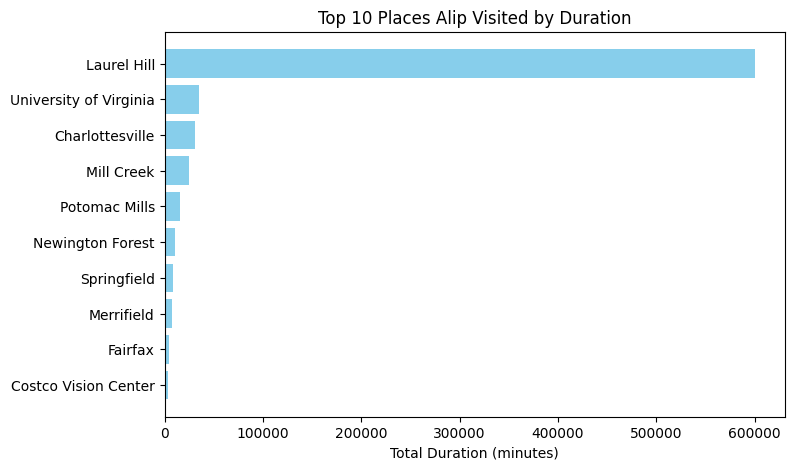

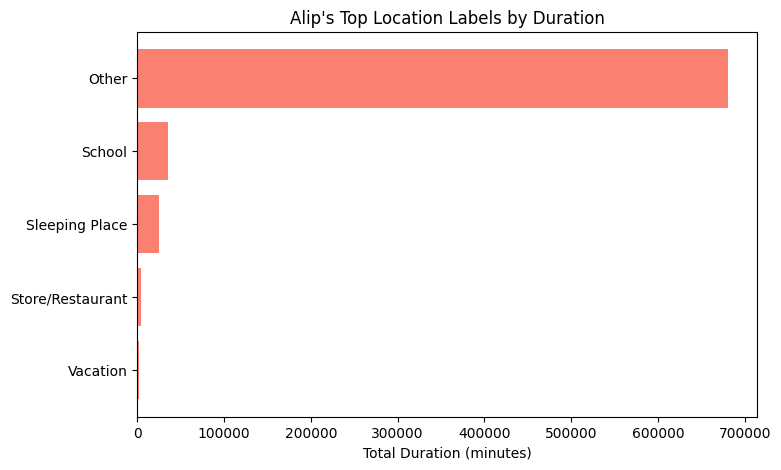

In [26]:
place_duration = filtered_locations.groupby('place_name')['duration'].sum().nlargest(10)
location_duration = filtered_locations.groupby('location_label')['duration'].sum()

# Plot Top 10 Places by Duration
plt.figure(figsize=(8, 5))
plt.barh(place_duration.index, place_duration.values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Places Alip Visited by Duration')
plt.xlabel('Total Duration (minutes)')
plt.show()

# Plot Top Location Labels by Duration
plt.figure(figsize=(8, 5))
plt.barh(location_duration.index, location_duration.values, color='salmon')
plt.gca().invert_yaxis()
plt.title("Alip's Top Location Labels by Duration")
plt.xlabel('Total Duration (minutes)')
plt.show()

## Benny's Data

In [ ]:
file_id = "12QU4_R_KdGqr8v0Y4e6yqNlTUtUI49KU" # Benny's data
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id={file_id}" -O location.json

with open("location.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df

records = []
for entry in data:
  if 'visit' in entry and 'topCandidate' in entry['visit']:
    start_time = entry['startTime']
    end_time = entry['endTime']
    location_str = entry['visit']['topCandidate']['placeLocation']
    if location_str.startswith("geo:"):
      lat, lon = map(float, location_str[4:].split(","))
      records.append({
        'start_time': pd.to_datetime(start_time),
        'end_time': pd.to_datetime(end_time),
        'latitude': lat,
        'longitude': lon
      })
  if 'timelinePath' in entry:
    base_time = pd.to_datetime(entry['startTime'], errors='coerce') # for the first point
    for i in range(1, len(entry['timelinePath'])):

      prev_point = entry['timelinePath'][i - 1]
      curr_point = entry['timelinePath'][i]

      prev_offset = int(prev_point['durationMinutesOffsetFromStartTime'])
      curr_offset = int(curr_point['durationMinutesOffsetFromStartTime'])

      prev_time = base_time + pd.to_timedelta(prev_offset, unit='m')
      curr_time = base_time + pd.to_timedelta(curr_offset, unit='m')

      duration = (curr_time - prev_time).total_seconds()

      if duration > 600: # places stayed at for longer than 10 mins?
        location_str = curr_point['point']
        if location_str.startswith("geo:"):
          lat, lon = map(float, location_str[4:].split(","))
          records.append({
            'start_time': prev_time,
            'end_time': curr_time,
            'latitude': lat,
            'longitude': lon
          })
locations = pd.DataFrame(records)

locations['start_time'] = pd.to_datetime(locations['start_time'], utc=True)
locations['end_time'] = pd.to_datetime(locations['end_time'], utc=True)
locations['start_time'] = locations['start_time'].dt.tz_convert('US/Eastern')
locations['end_time'] = locations['end_time'].dt.tz_convert('US/Eastern')
# the above fixed an issue where the times would not convert and turn into NaT

locations['duration'] = (locations['end_time'] - locations['start_time']).dt.total_seconds()
locations

filtered_locations = locations[locations['duration'] > 600] # places stayed at for longer than 10 mins?
filtered_locations

--2025-03-31 03:58:52--  https://drive.google.com/uc?export=download&id=12QU4_R_KdGqr8v0Y4e6yqNlTUtUI49KU
Resolving drive.google.com (drive.google.com)... 173.194.69.101, 173.194.69.102, 173.194.69.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.69.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12QU4_R_KdGqr8v0Y4e6yqNlTUtUI49KU&export=download [following]
--2025-03-31 03:58:53--  https://drive.usercontent.google.com/download?id=12QU4_R_KdGqr8v0Y4e6yqNlTUtUI49KU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.79.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566944 (554K) [application/octet-stream]
Saving to: ‘location.json’

location.json       100%[===================>] 553.66K  --.-KB/s  

,start_time,end_time,latitude,longitude,duration
0,2024-10-28 21:55:12.345000-04:00,2024-10-29 07:27:08.230000-04:00,38.033553,-78.507977,34315.885
1,2024-10-29 07:27:08.230000-04:00,2024-11-02 19:22:52.081000-04:00,38.027414,-78.511266,388543.851
2,2024-11-02 19:31:13-04:00,2024-11-02 21:13:04.038000-04:00,38.036071,-78.487989,6111.038
3,2024-11-02 21:16:46.048000-04:00,2024-11-03 12:09:33.053000-05:00,38.051446,-78.498845,57167.005
4,2024-11-03 12:09:33.053000-05:00,2024-11-07 10:53:01.482000-05:00,38.060587,-78.493320,341008.429
...,...,...,...,...,...
421,2025-03-23 14:29:00-04:00,2025-03-23 14:41:00-04:00,38.029126,-78.513869,720.000
422,2025-03-23 22:40:00-04:00,2025-03-23 23:33:00-04:00,38.055780,-78.521198,3180.000
423,2025-03-24 00:09:00-04:00,2025-03-24 00:45:00-04:00,38.027432,-78.510978,2160.000
424,2025-03-24 20:15:00-04:00,2025-03-24 22:00:00-04:00,38.052863,-78.510374,6300.000


In [ ]:
epsilon = 0.001
min_samples = 5
coords = filtered_locations[['latitude', 'longitude']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)
db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean').fit(coords_scaled)
filtered_locations['cluster'] = db.labels_

<ipython-input-19-5b77934ef27d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations['cluster'] = db.labels_


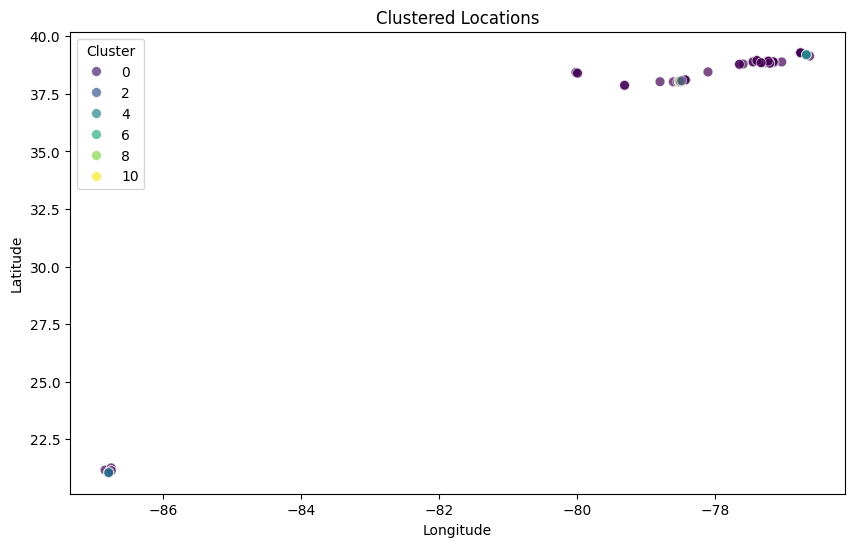

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_locations, x='longitude', y='latitude', hue='cluster', palette='viridis', s=50, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Locations')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 21.04512, -86.782599	is Cancun?